In [1]:
# Importiere die benötigten Bibliotheken
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# Definiere den Pfad zu den Testdaten
test_dataset_dir = './dataset/test_images'

# Erstelle einen ImageDataGenerator für die Testdaten ohne Augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Erstelle den Testdaten-Generator
test_generator = test_datagen.flow_from_directory(
    test_dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1711 images belonging to 50 classes.


In [8]:
def calculateModelMetrics(modelpath):
    # Lade das Modell und führe Vorhersagen durch
    model = load_model(modelpath)
    y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    categories = list(test_generator.class_indices.keys())

    # Berechne die Anzahl der wahren und vorhergesagten Klassen sowie der korrekt vorhergesagten Klassen
    true_counts = np.zeros(len(categories), dtype=int)
    pred_counts = np.zeros(len(categories), dtype=int)
    correct_counts = np.zeros(len(categories), dtype=int)

    for i in range(len(categories)):
        true_counts[i] = np.sum(y_true == i)
        pred_counts[i] = np.sum(y_pred == i)
        correct_counts[i] = np.sum((y_true == i) & (y_pred == i))

    # Erstelle eine Tabelle mit den Ergebnissen
    results = pd.DataFrame({
        'Category': categories,
        'True Count': true_counts,
        'Predicted Count': pred_counts,
        'Correct Predictions': correct_counts
    })

    return results

def visualizeMetrics(result_df):
    plt.figure(figsize=(30, 10))
    x = np.arange(len(result_df.index))
    width = 0.2

    plt.bar(x - width, result_df["True Count"], width, label='True Count')
    plt.bar(x, result_df["Predicted Count"], width, label='Predicted Count')
    plt.bar(x + width, result_df["Correct Predictions"], width, label='Correct Predictions')

    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title('True vs Predicted vs Correct Predictions per Category')
    plt.xticks(x, result_df["Category"], rotation=90)
    plt.legend()
    plt.show()

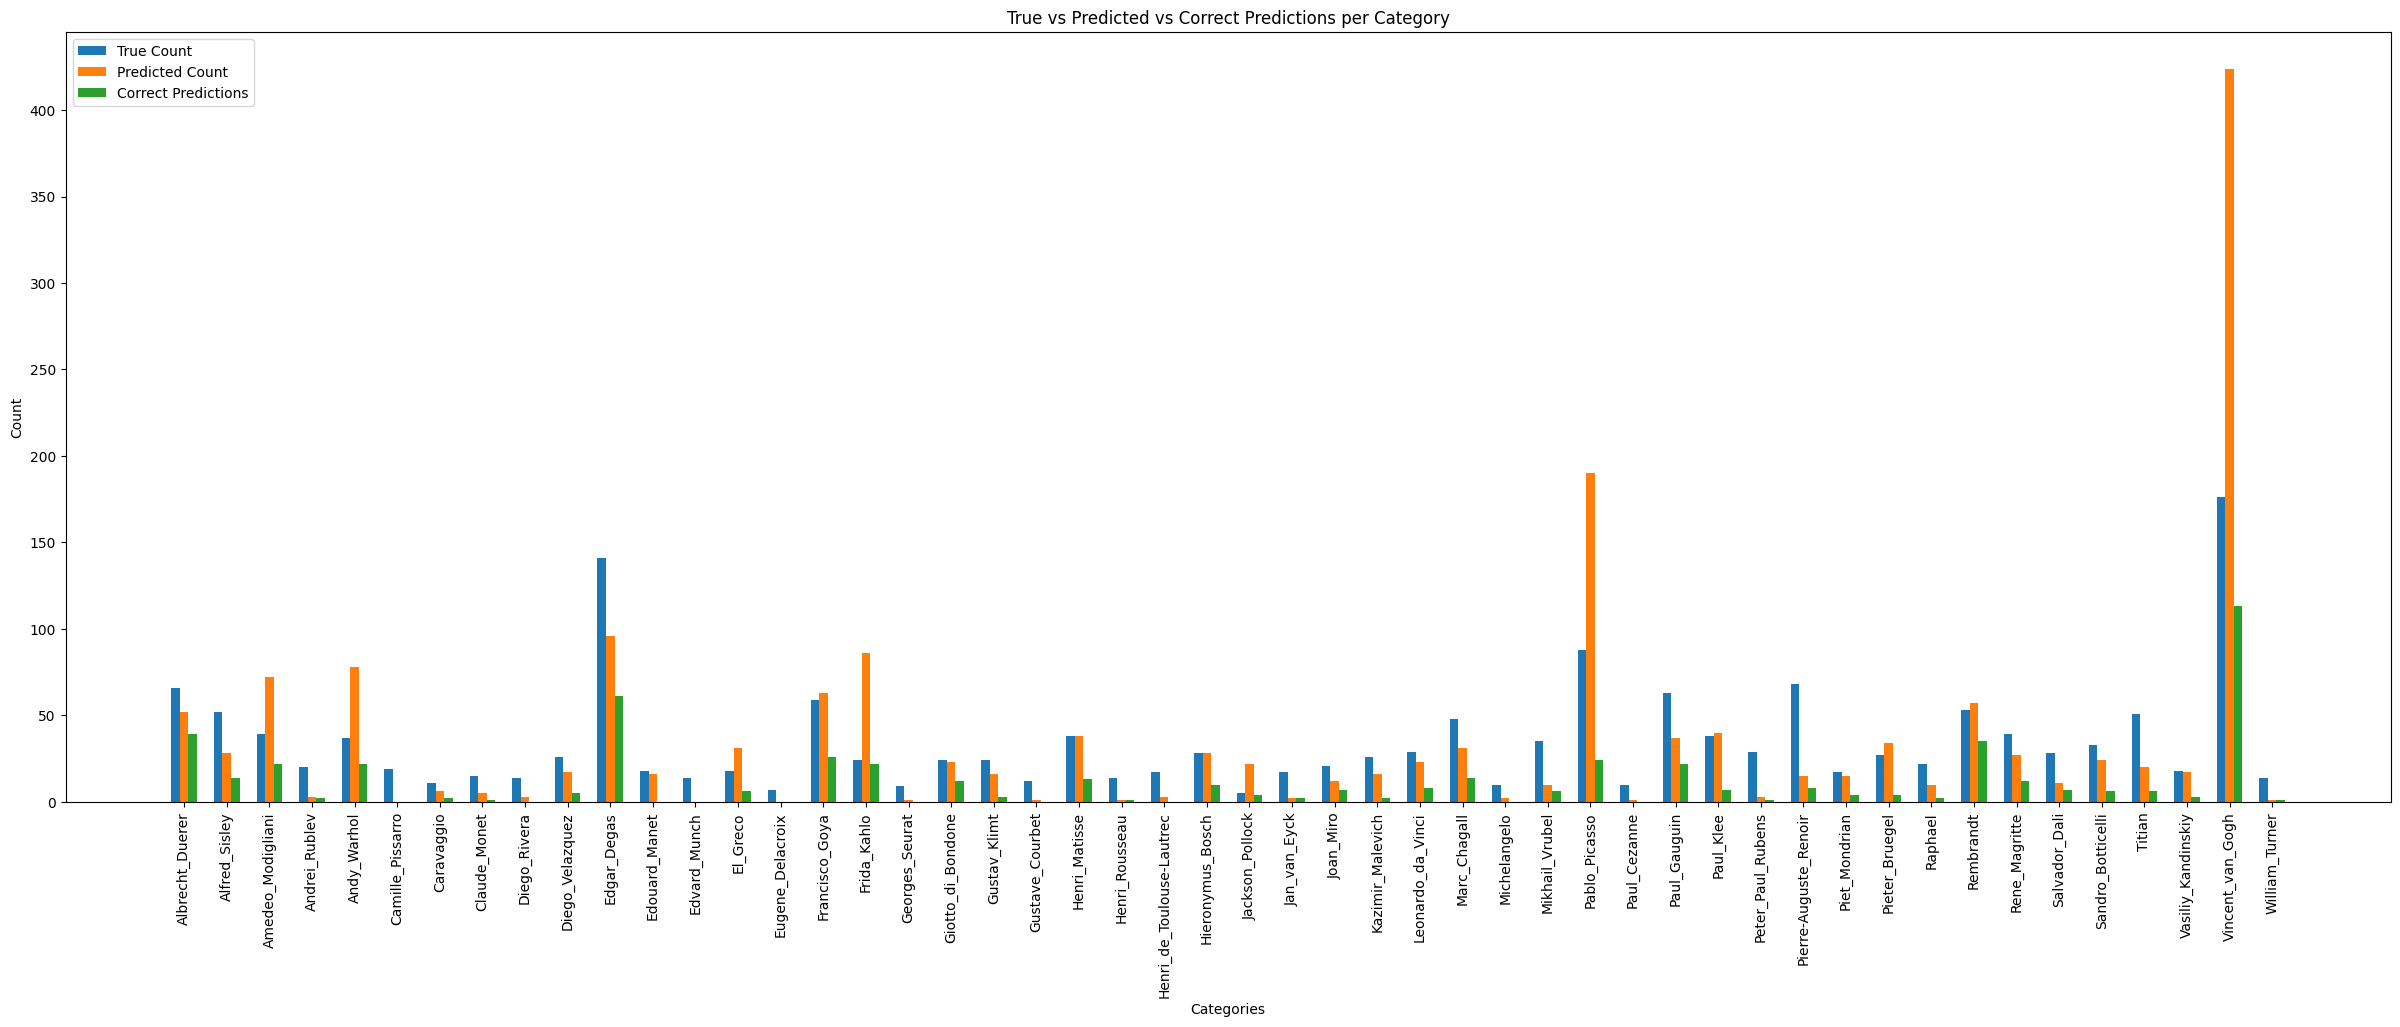

In [25]:
# Lade das Modell und führe Vorhersagen durch
results_v2 = calculateModelMetrics('./trained_models/my_model_v2.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v2)

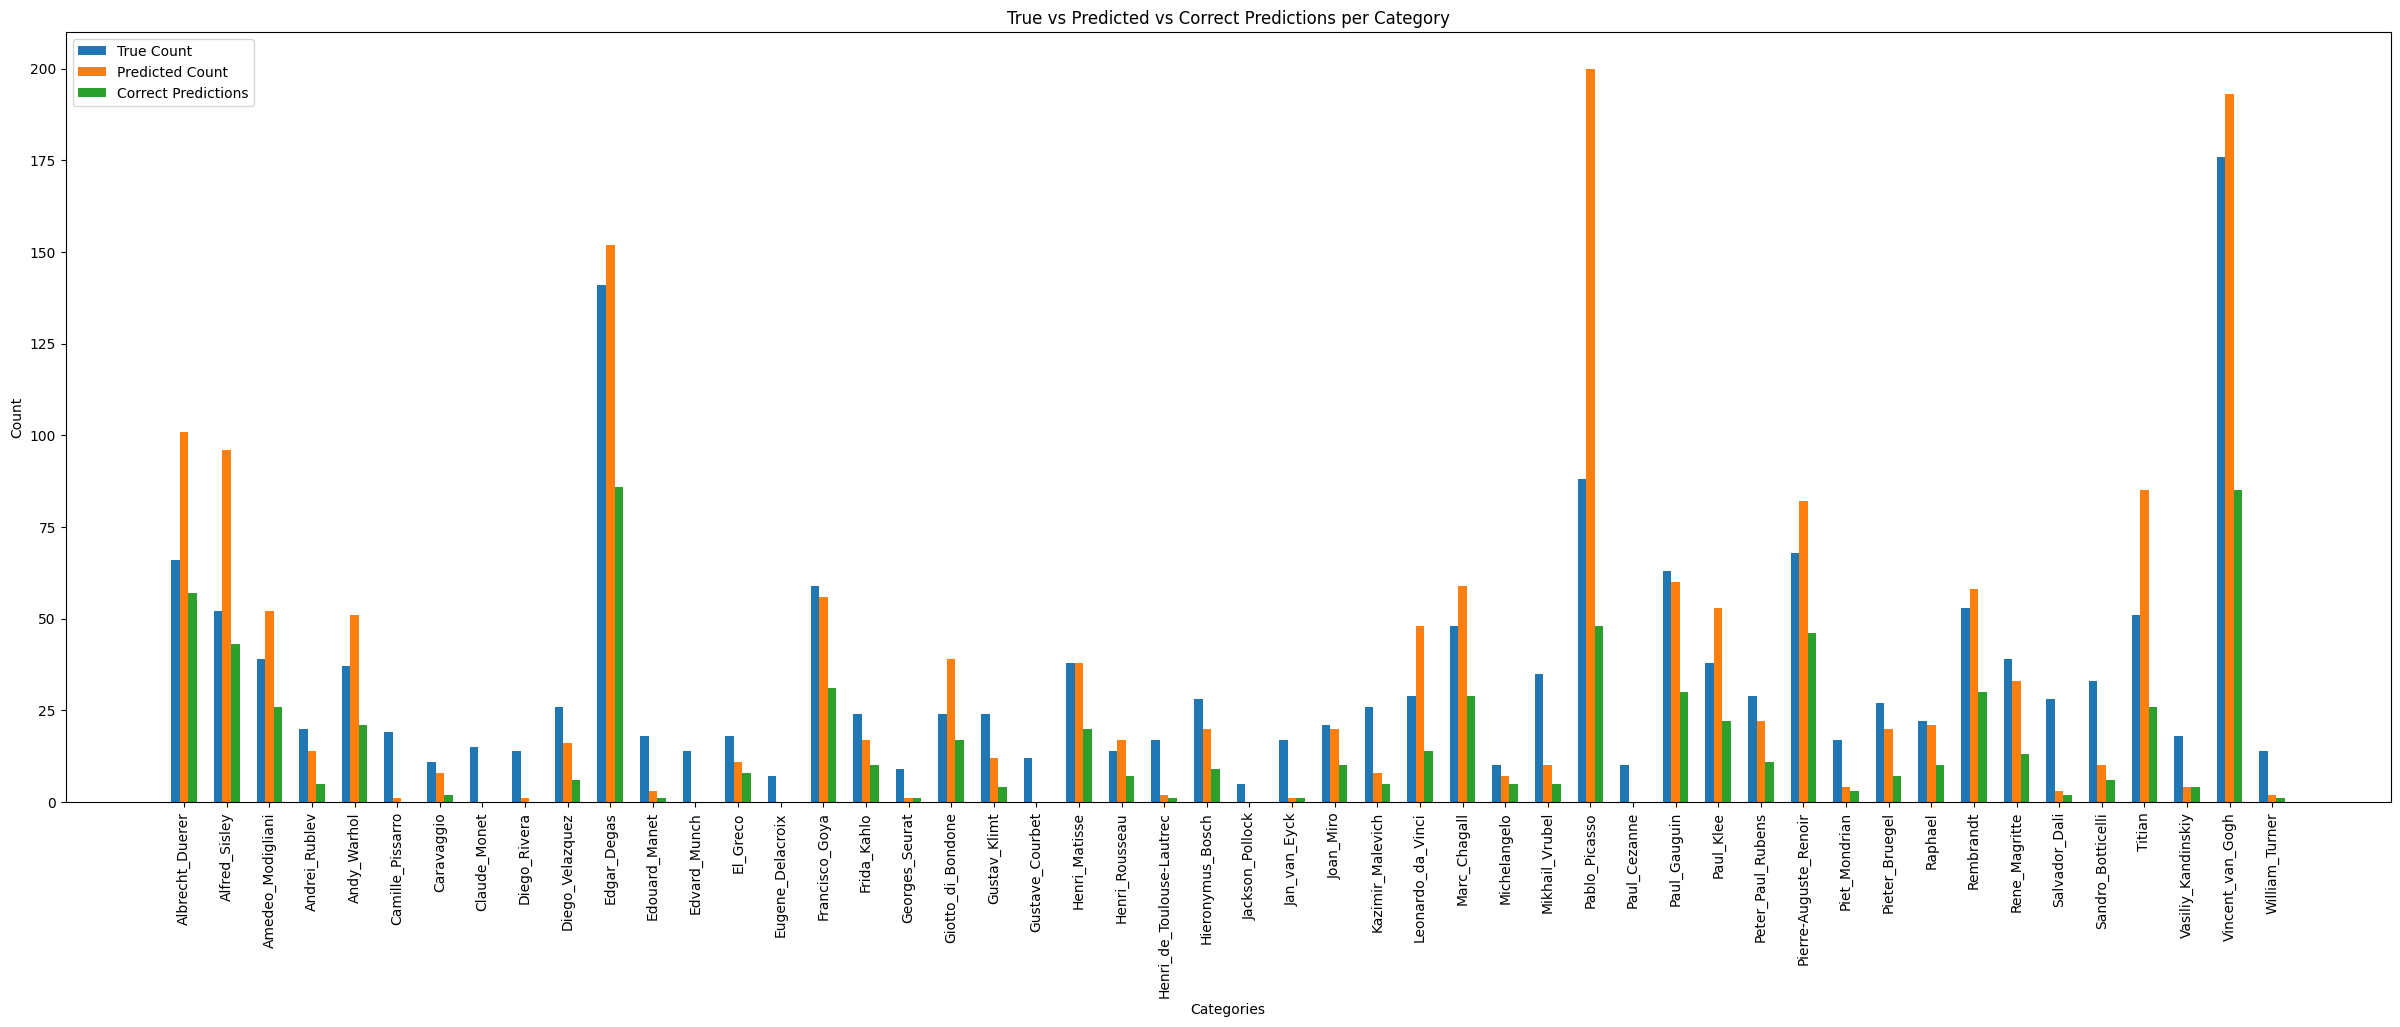

In [26]:
# Lade das Modell und führe Vorhersagen durch
results_v6 = calculateModelMetrics('./trained_models/my_model_v4.h5')
# Visualisierung der Ergebnisse
visualizeMetrics(results_v6)

In [23]:
# For Model V3
results_v2["Accuracy"] = 0.0

print(type(results_v2["True Count"]))

for index, row in results_v2.iterrows():
     results_v2.at[index, "Accuracy"] = round(row["Correct Predictions"] / row["True Count"] * 100, 2)

# For Model V6
results_v6["Accuracy"] = 0.0

print(type(results_v6["True Count"]))

for index, row in results_v6.iterrows():
     results_v6.at[index, "Accuracy"] = round(row["Correct Predictions"] / row["True Count"] * 100, 2)

results_v6.to_csv('results_v6.csv')

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
